In [2]:
import igraph as ig
import json
import pandas as pd

In [13]:
df_nodes = pd.read_csv("cit-Patents_1092_919138_nodes.csv")
df_edges = pd.read_csv("cit-Patents_1092_919138.csv")
nodes_data = list(df_nodes['id'])
edges_data = df_edges.to_json(orient='records')
edges_json = json.loads(edges_data)

In [14]:
nodes_data.sort()

In [15]:
nodes_dict = {}
for i in range(len(nodes_data)):
    nodes_dict[nodes_data[i]] = i

In [16]:
# labels=[]
# group=[]
# for node in data['nodes']:
#     labels.append(node['name'])
#     group.append(node['group'])

In [17]:
edges = [(nodes_dict[elem["source"]],nodes_dict[elem["target"]]) for elem in edges_json]
print("total edges: ",len(edges))
g=ig.Graph()
g.add_vertices(len(nodes_data))
g.add_edges(edges)
# G=ig.Graph(3,Edges, directed=False)

total edges:  1092


In [18]:
layt=g.layout('kk', dim=3)

In [19]:
layt[2]

[-0.10813565175902455, 0.007349091601541805, -0.9941089837997055]

In [20]:
Xn=[layt[k][0] for k in range(3)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(3)]# y-coordinates
Zn=[layt[k][2] for k in range(3)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

In [21]:
import plotly.offline as py
import plotly.graph_objs as go

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='node',
               marker=dict(symbol='circle',
                             size=2,
                             color="#69b3a2",
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=nodes_data,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Network of 1092 edges",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="Data source: cit-Patents_1092_919138.csv",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

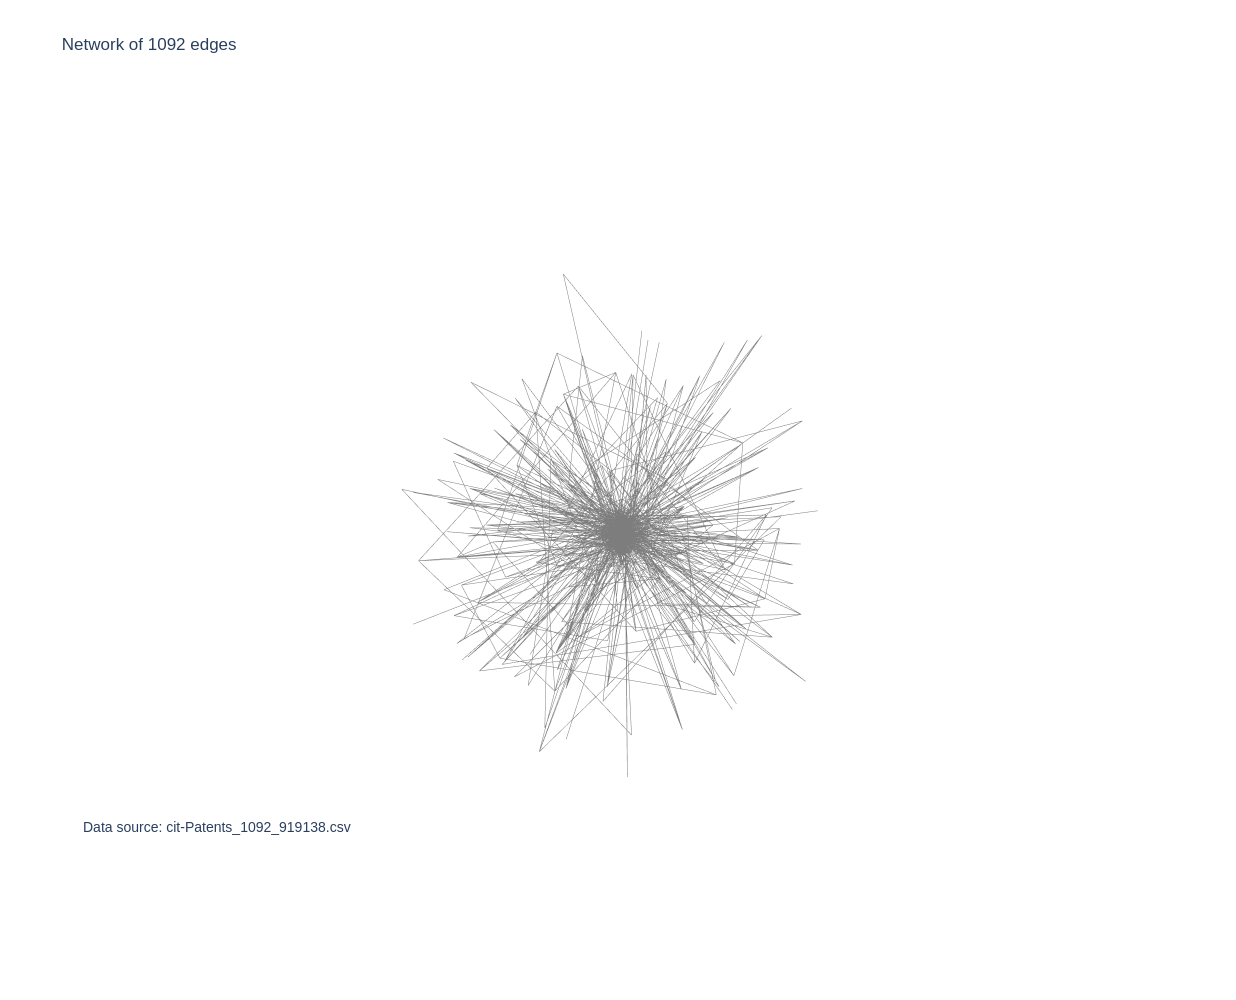

In [22]:
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

py.iplot(fig, filename='cit-Patents_1092_919138')